<a href="https://colab.research.google.com/github/Trailblazer29/AMP-Activity-Prediction/blob/main/AMP_Activity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><H1>Antimicrobial Peptide Activity Prediction</</H1></center>

In this project, we will build a machine learning model that predicts the activity of antimicrobial peptides. This model will be trained on a filtered [subset](https://cbbio.online/AxPEP/?action=dataset) of the AmPEP dataset.

# Installations

## Conda

In [1]:
# Install Conda
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...


## Pfeature

The [Pfeature](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf) library allows for the computing of protein/peptide properties/features.

This work is focused on short peptides, consisting of 5-30 amino acids each, that have antimicrobial activity. We will use Pfeature to calculate the molecular properties of peptides, which will serve as input features for our AMP activity prediction model.

In [1]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
! unzip Pfeature.zip

--2023-11-27 18:20:09--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2023-11-27 18:20:10--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519486 (507K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 507.31K  --.-KB/s    in 0.02s   

2023-11-27 18:20:10 (30.7 MB/s) - ‘Pfeature.zip’ saved [519486/519486]

Archive:  Pfeature.zip
   creating: P

In [2]:
# Install Pfeature
%cd Pfeature
! python setup.py install

/content/Pfeature
/usr/local/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


## CD-HIT

In [3]:
# Install CD-HIT
! conda install -c bioconda cd-hit

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    cd-hit-4.8.1               |       h43eeafb_9         232 KB  bioconda
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    openssl-3.2.0              |       hd590300_0         2.7 MB  conda-forge
    zlib-1.2.13                |    

## Lazypredict

In [4]:
! pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 44.5 MB/s eta 0:00:00


# Import Required Libraries & Packages

In [5]:
import sys
import pandas as pd
from Pfeature.pfeature import aac_wp, dpc_wp, tpc_wp
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report, RocCurveDisplay

# Download the AmPEP Training & Testing Datasets

In [6]:
! wget https://sourceforge.net/projects/axpep/files/Deep-AmPEP30_datasets/deep-ampep30-train_set.zip
! wget https://sourceforge.net/projects/axpep/files/Deep-AmPEP30_datasets/deep-ampep30-test_set.zip

--2023-11-27 18:23:30--  https://sourceforge.net/projects/axpep/files/Deep-AmPEP30_datasets/deep-ampep30-train_set.zip
Resolving sourceforge.net (sourceforge.net)... 172.64.150.145, 104.18.37.111, 2606:4700:4400::ac40:9691, ...
Connecting to sourceforge.net (sourceforge.net)|172.64.150.145|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/axpep/files/Deep-AmPEP30_datasets/deep-ampep30-train_set.zip/ [following]
--2023-11-27 18:23:30--  https://sourceforge.net/projects/axpep/files/Deep-AmPEP30_datasets/deep-ampep30-train_set.zip/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/axpep/files/Deep-AmPEP30_datasets/deep-ampep30-train_set.zip/download [following]
--2023-11-27 18:23:30--  https://sourceforge.net/projects/axpep/files/Deep-AmPEP30_datasets/deep-ampep30-train_set.zip/download
Reusing existing connect

In [7]:
! unzip deep-ampep30-train_set.zip
! unzip deep-ampep30-test_set.zip

Archive:  deep-ampep30-train_set.zip
   creating: train_set/
  inflating: train_set/train_ne.fasta  
  inflating: train_set/train_po.fasta  
  inflating: train_set/train_po_ne.fasta  
Archive:  deep-ampep30-test_set.zip
   creating: test_set/
  inflating: test_set/test_ne.fasta  
  inflating: test_set/test_po.fasta  


In [8]:
ls -l

total 448
drwxr-xr-x 4 root root   4096 Nov 27 18:20 build/
-rw-r--r-- 1 root root   4332 Nov 10 06:36 cuda-keyring_1.0-1_all.deb
-rw-r--r-- 1 root root   3326 Jan 18  2020 deep-ampep30-test_set.zip
-rw-r--r-- 1 root root  77275 Jan 18  2020 deep-ampep30-train_set.zip
drwxr-xr-x 2 root root   4096 Nov 27 18:20 dist/
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
-rw-r--r-- 1 root root  17294 Nov 10 06:36 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x 3 root root   4096 Nov 27 18:22 Pfeature/
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
drwxr-xr-x 2 root root   4096 Nov 27 18:20 Pfeature.egg-info/
-rw-r--r-- 1 root root    971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root   1265 Sep 29  2020 README
-rw-r--r-- 1 root root   1267 Sep 29  2020 setup.py
drwxr-xr-x 2 root root   4096 Jan  8  2020 test_set/
drwxr-xr-x 2 root root   4096 Jan  6  2020 train_set/


In [9]:
%cd train_set

/content/Pfeature/train_set


In [10]:
ls -l

total 216
-rw-r--r-- 1 root root  57206 Jan  5  2020 train_ne.fasta
-rw-r--r-- 1 root root  52619 Jan  5  2020 train_po.fasta
-rw-r--r-- 1 root root 109825 Jan  5  2020 train_po_ne.fasta


In [11]:
! cat train_po.fasta

>amp5_30_1
ACSAG
>amp5_30_2
AMVGT
>amp5_30_3
AMVSS
>amp5_30_4
CPFVC
>amp5_30_5
SPGGA
>amp5_30_6
DDDDDD
>amp5_30_7
FRWWHR
>amp5_30_8
RKKWFW
>amp5_30_9
RRWWRF
>amp5_30_10
TVVTNA
>amp5_30_11
TVVTQA
>amp5_30_12
TVYTNA
>amp5_30_13
TVYTQA
>amp5_30_14
CSYTMEA
>amp5_30_15
GSEIQPR
>amp5_30_16
KVFLGLK
>amp5_30_17
LKLLKKL
>amp5_30_18
MRTGNAD
>amp5_30_19
MRTGNAN
>amp5_30_20
VISIIPV
>amp5_30_21
ASILTNAS
>amp5_30_22
FFFLSRIF
>amp5_30_23
FFHLHFHY
>amp5_30_24
KIIFLIAI
>amp5_30_25
PFKLSLHL
>amp5_30_26
QPFSLERW
>amp5_30_27
TCSYTMEA
>amp5_30_28
VAGRAQGM
>amp5_30_29
VRPYLVAF
>amp5_30_30
AHCLAIGRK
>amp5_30_31
ALLLAIRKR
>amp5_30_32
ALRLAIRKR
>amp5_30_33
ALWLAIRKR
>amp5_30_34
ALYLAIRKR
>amp5_30_35
AWKLFDDGV
>amp5_30_36
AWLLAIRKR
>amp5_30_37
DEKGPKWKR
>amp5_30_38
DYHHGVRVL
>amp5_30_39
EPFKISIHL
>amp5_30_40
EPFKLSLHL
>amp5_30_41
FLGFLHHLF
>amp5_30_42
FLGFLKNLF
>amp5_30_43
FLHFLHHLF
>amp5_30_44
GVCDMADLA
>amp5_30_45
GVVPHDFRI
>amp5_30_46
IAKVALKAL
>amp5_30_47
KIKFLKVLT
>amp5_30_48
NIPQLTPTP
>amp5_30_49
NRWCFAGD

In **amp5_30_1 ACSAG**:

* **amp5_30_1** is the peptide's identification name. **amp** indicates that there is an antimicrobial activity, while **nonamp** denotes that there isn't.

* **ACSAG** is the peptide sequence, where each letter denotes a single amino acid. The twenty common amino acids are depicted in the below figure, along with their acronyms and chemical structures.

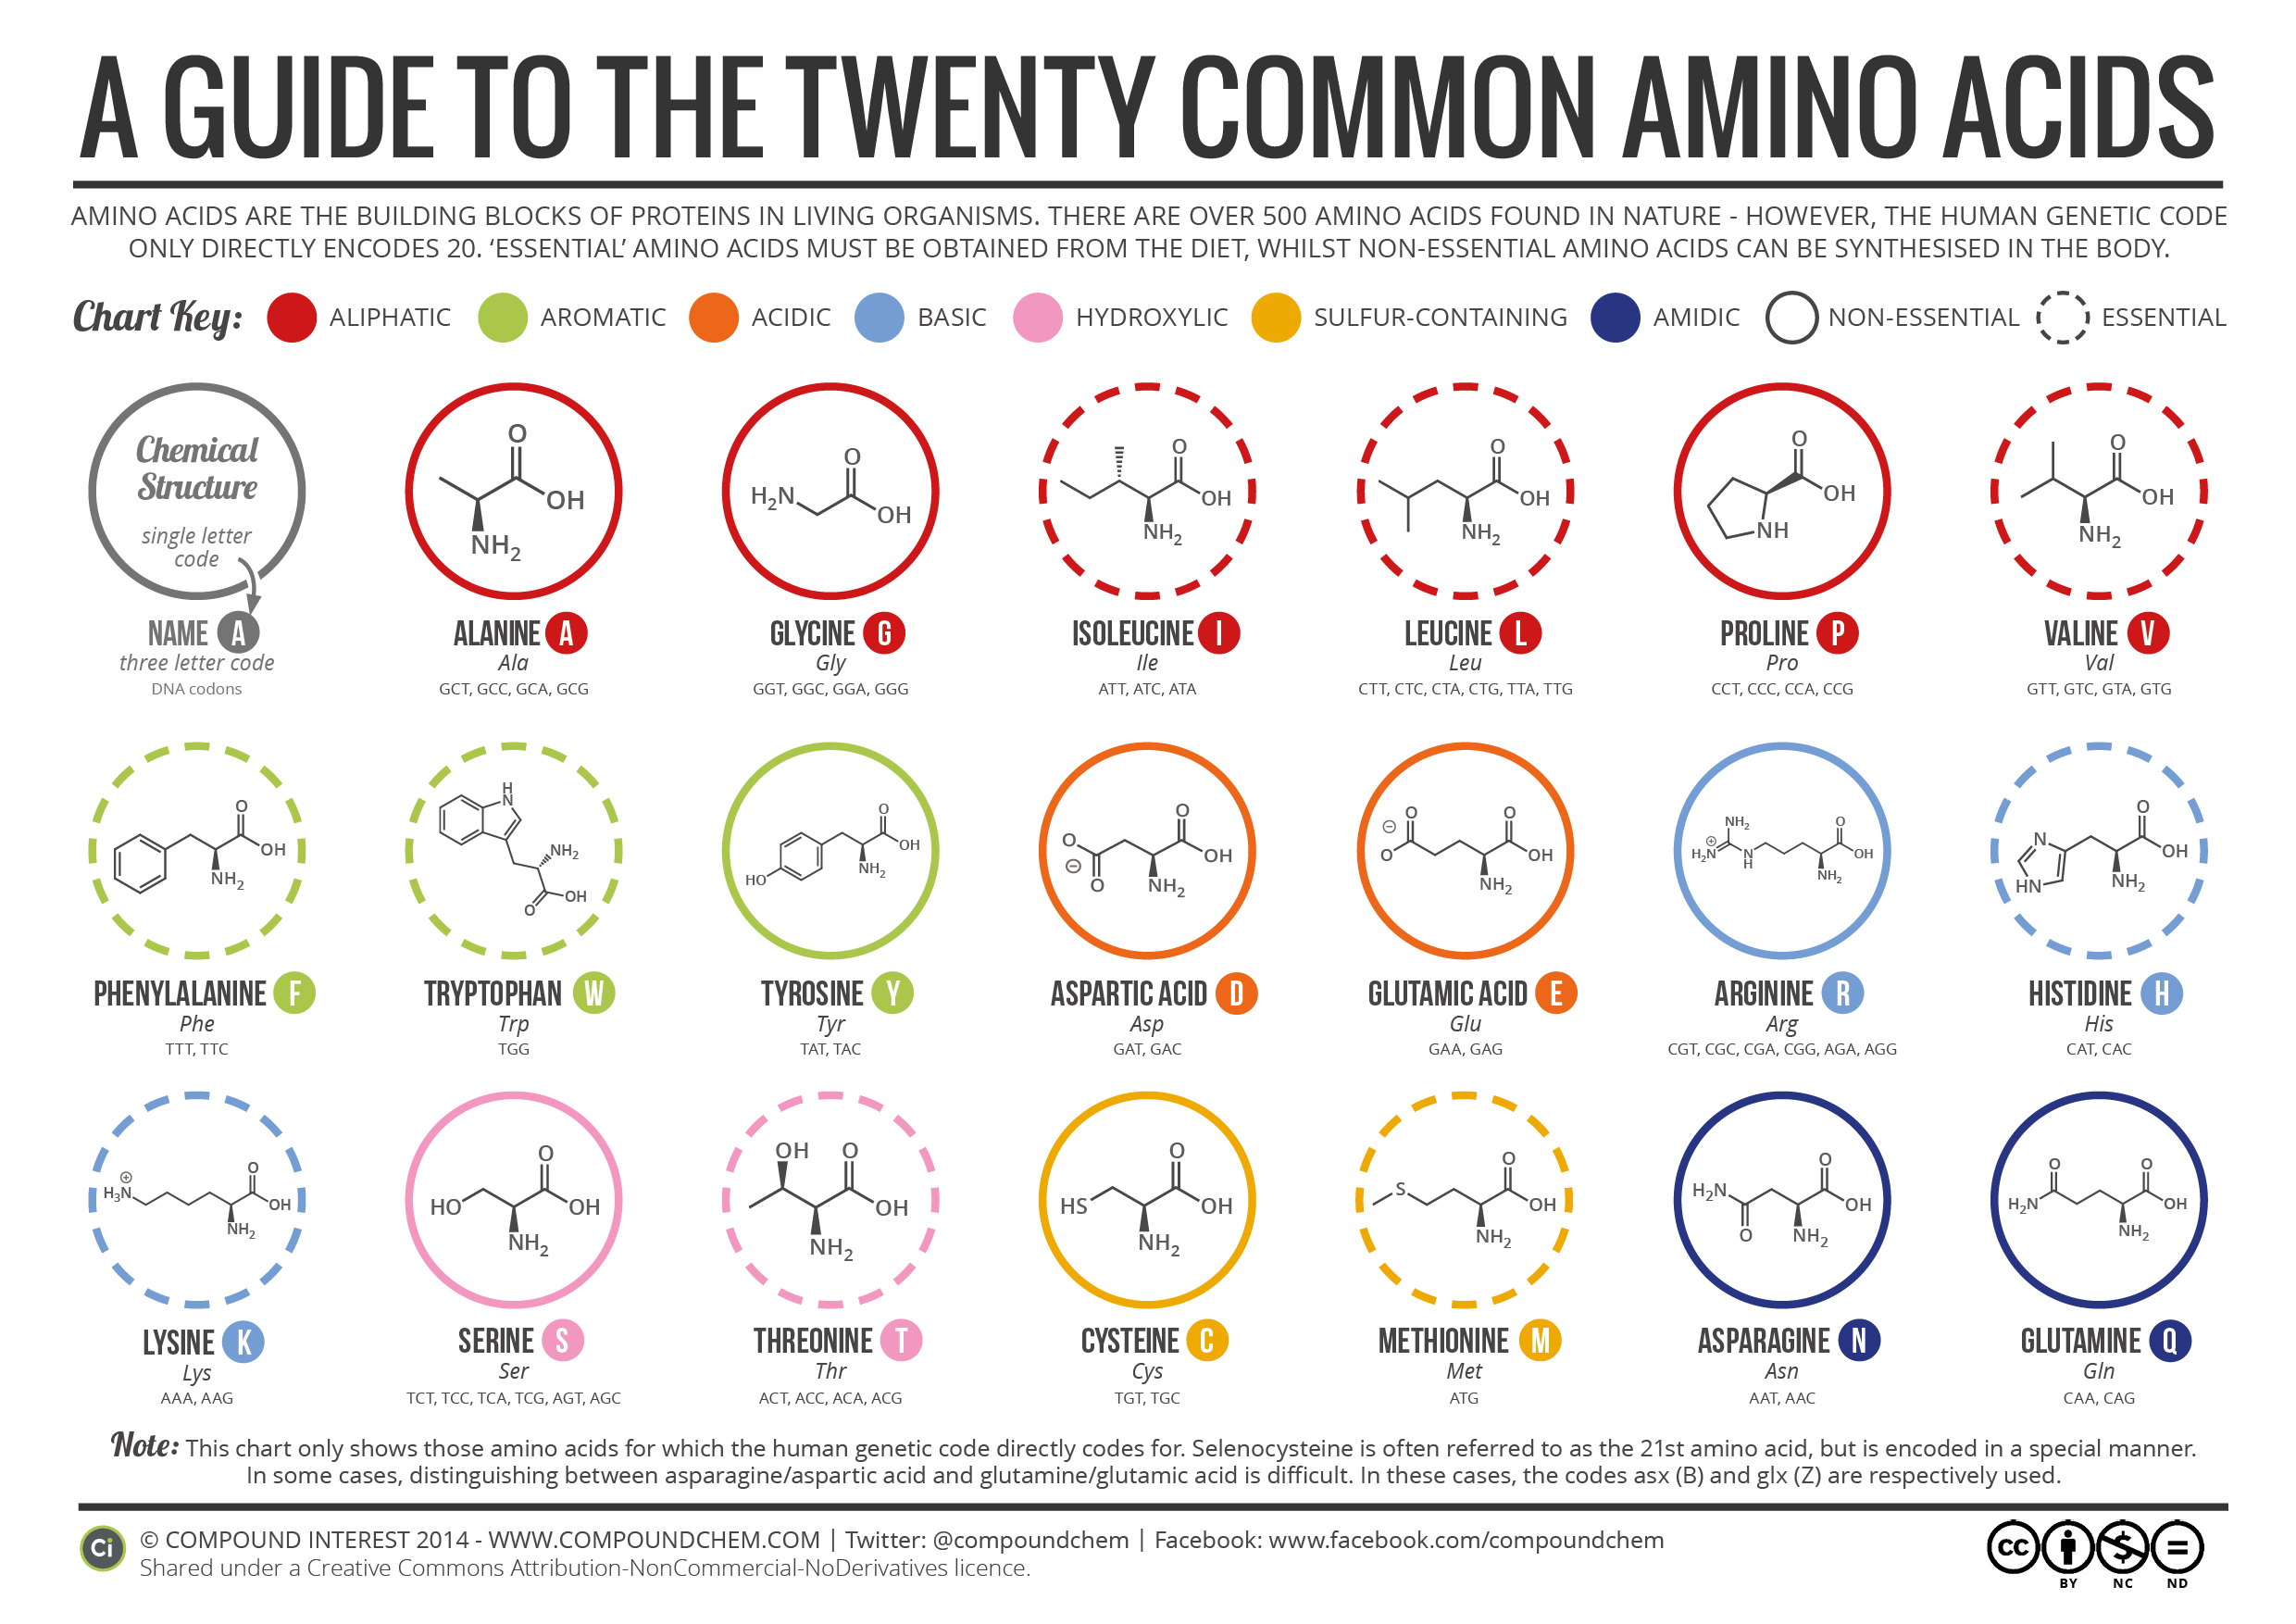

Source: https://www.compoundchem.com/2014/09/16/aminoacids/

## Copy training and testing sets to the same folder

In [12]:
cp -v train_po.fasta train_ne.fasta ..

'train_po.fasta' -> '../train_po.fasta'
'train_ne.fasta' -> '../train_ne.fasta'


In [13]:
%cd ..
%cd test_set
!ls -l

/content/Pfeature
/content/Pfeature/test_set
total 16
-rw-r--r-- 1 root root 8659 Jan  5  2020 test_ne.fasta
-rw-r--r-- 1 root root 3946 Jan  5  2020 test_po.fasta


In [14]:
cp -v test_ne.fasta test_po.fasta ..

'test_ne.fasta' -> '../test_ne.fasta'
'test_po.fasta' -> '../test_po.fasta'


In [15]:
%cd ..
!ls -l

/content/Pfeature
total 572
drwxr-xr-x 4 root root   4096 Nov 27 18:20 build
-rw-r--r-- 1 root root   4332 Nov 10 06:36 cuda-keyring_1.0-1_all.deb
-rw-r--r-- 1 root root   3326 Jan 18  2020 deep-ampep30-test_set.zip
-rw-r--r-- 1 root root  77275 Jan 18  2020 deep-ampep30-train_set.zip
drwxr-xr-x 2 root root   4096 Nov 27 18:20 dist
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
-rw-r--r-- 1 root root  17294 Nov 10 06:36 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x 3 root root   4096 Nov 27 18:22 Pfeature
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
drwxr-xr-x 2 root root   4096 Nov 27 18:20 Pfeature.egg-info
-rw-r--r-- 1 root root    971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root   1265 Sep 29  2020 README
-rw-r--r-- 1 root root   1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root   8659 Nov 27 18:27 test_ne.fasta
-rw-r--r-- 1 root root   3946 Nov 27 18:27 test_po.fasta
drwxr-xr-x 2 root root   4096 Jan  8  2020 test_set
-rw-r--r-- 1 root root  57206 Nov

All training and testing sets are now under the same folder.

# Remove redundant sequences using CD-HIT

We will remove duplicated sequences (i.e., peptide sequences with a peptide similarity of 100%) from the training dataset, using the CD-HIT program. Unique peptide sequences will be saved in text files, under the name original_filename_cdhit.txt.

In [16]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 1

Program: CD-HIT, V4.8.1 (+OpenMP), May 15 2023, 22:49:31
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 1

Started: Mon Nov 27 18:27:43 2023
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89796593

comparing sequences from          0  to       1445
.
     1445  finished       1345  clusters

Approximated maximum memory consumption: 81M
writing new database
writing clustering information
program completed !

Total CPU time 0.13


In [17]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 1

Program: CD-HIT, V4.8.1 (+OpenMP), May 15 2023, 22:49:31
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 1

Started: Mon Nov 27 18:29:53 2023
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89796051

comparing sequences from          0  to       1445
.
     1445  finished       1424  clusters

Approximated maximum memory consumption: 81M
writing new database
writing clustering information
program completed !

Total CPU time 0.17


In [18]:
ls -l

total 792
drwxr-xr-x 4 root root   4096 Nov 27 18:20 build/
-rw-r--r-- 1 root root   4332 Nov 10 06:36 cuda-keyring_1.0-1_all.deb
-rw-r--r-- 1 root root   3326 Jan 18  2020 deep-ampep30-test_set.zip
-rw-r--r-- 1 root root  77275 Jan 18  2020 deep-ampep30-train_set.zip
drwxr-xr-x 2 root root   4096 Nov 27 18:20 dist/
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
-rw-r--r-- 1 root root  17294 Nov 10 06:36 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x 3 root root   4096 Nov 27 18:22 Pfeature/
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
drwxr-xr-x 2 root root   4096 Nov 27 18:20 Pfeature.egg-info/
-rw-r--r-- 1 root root    971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root   1265 Sep 29  2020 README
-rw-r--r-- 1 root root   1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root   8659 Nov 27 18:27 test_ne.fasta
-rw-r--r-- 1 root root   3946 Nov 27 18:27 test_po.fasta
drwxr-xr-x 2 root root   4096 Jan  8  2020 test_set/
-rw-r--r-- 1 root root  54416 Nov 27 18:29 tra

In [22]:
# Initial number of positive peptide sequences (amp)
! grep ">" train_po.fasta | wc -l
# Number of unique positive peptide sequences
! grep ">" train_po_cdhit.txt | wc -l
# Initial number of negative peptide sequences (amp)
! grep ">" train_ne.fasta | wc -l
# Number of unique negative peptide sequences
! grep ">" train_ne_cdhit.txt | wc -l

1529
1345
1529
1424


We went from 1529 to 1345 amp/positive peptide sequences and 1529 to 1424 nonamp/negative peptide sequences, i.e., a total of 289 sequences were eliminated.

# Calculate features of whole peptides (WP)

## Amino Acid Composition (AAC)

The AAC function will compute the composition of each of the 20 amino acids, in each peptide sequence (i.e., the frequence of each AA in each sequence).

In [23]:
def aac(input):
  output = input.split(".")[0] + "_aac.csv"
  aac_wp(input, output)
  aac_df = pd.read_csv(output)
  return aac_df

# Example
aac("train_po_cdhit.txt")

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1341,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1342,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1343,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


## Dipeptide composition (DPC)

DPC will compute the percentage composition of all possible dipeptides (i.e., 20^2=400 different dipeptides) in each peptide sequence.

In [24]:
def dpc(input):
  output = input.split(".")[0] + "_dpc.csv"
  dpc_wp(input, output, 1)
  dpc_df = pd.read_csv(output)
  return dpc_df

# Example
dpc("train_po_cdhit.txt")

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1341,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1342,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.90,...,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1343,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,3.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Tripeptide Composition (TPC)

TPC will compute the percentage composition of all possible tripeptides (i.e., 20^3=8000 different tripeptides) in each peptide sequence.

In [25]:
def tpc(input):
  input_name = input.rstrip(".txt")
  output_name = input_name + "_tpc.csv"
  tpc_wp(input, output_name)
  tpc_df = pd.read_csv(output_name)
  return tpc_df

# Example
#tpc("train_po_cdhit.txt")

## General feature calculation function

The **feature_calc** function will calculate any peptide feature, given its name.

In [26]:
def feature_calc(po_data, ne_data, feature_name):
  # Calculate feature values
  po_feature = feature_name(po_data)
  ne_feature = feature_name(ne_data)

  # Create class labels (0 for negative/nonamp and 1 for positive/amp)
  po_class = pd.Series([1 for i in range(len(po_feature))])
  ne_class = pd.Series([0 for i in range(len(ne_feature))])

  # Combine po and ne datasets
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)

  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

# Example
feature_calc("train_po_cdhit.txt", "train_ne_cdhit.txt", aac)

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09,1
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00,1
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,1
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,1
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00,0
1420,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00,0
1421,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67,0
1422,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33,0


# AMP Activity Prediction Model

## Training and testing datasets preprocessing

In [27]:
# Feature calculation
train_set = feature_calc("train_po_cdhit.txt", "train_ne_cdhit.txt", aac)
test_set = feature_calc("test_po.fasta", "test_ne.fasta", aac)

In [28]:
# Split datasets into input features and class feature
X_train = train_set.drop("class", axis=1)
y_train = train_set['class']

X_test = test_set.drop("class", axis=1)
y_test = test_set["class"]

## Feature selection

In [30]:
# Feature names
X_train.columns

Index(['AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I',
       'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S',
       'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y'],
      dtype='object')

### Remove features with no variance

In [32]:
# Select features with 0 variance
selector = VarianceThreshold()
selector.fit_transform(X_train)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

There are no features with 0 variance.

In [ ]:
# Remove features with 0 variance
#X_train = X_train.loc[:, selector.get_support()]
#X_test = X_test.loc[:, selector.get_support()]

## Model selection

In [33]:
clf = LazyClassifier(verbose=0, custom_metric=matthews_corrcoef)
models_train, _ = clf.fit(X_train, X_train, y_train, y_train)
models_train

100%|██████████| 29/29 [00:14<00:00,  2.07it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
RandomForestClassifier,0.91,0.91,0.91,0.91,0.83,1.22
XGBClassifier,0.91,0.91,0.91,0.91,0.82,3.98
LabelSpreading,0.91,0.91,0.91,0.91,0.82,1.56
LabelPropagation,0.91,0.91,0.91,0.91,0.83,1.29
DecisionTreeClassifier,0.91,0.91,0.91,0.91,0.83,0.08
ExtraTreeClassifier,0.91,0.91,0.91,0.91,0.83,0.03
ExtraTreesClassifier,0.91,0.91,0.91,0.91,0.83,0.66
BaggingClassifier,0.91,0.91,0.91,0.91,0.81,0.27
LGBMClassifier,0.90,0.90,0.90,0.90,0.80,0.18


In [34]:
models_test, _ = clf.fit(X_train, X_test, y_train, y_test)
models_test

100%|██████████| 29/29 [00:12<00:00,  2.41it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
BernoulliNB,0.81,0.81,0.81,0.81,0.62,0.03
KNeighborsClassifier,0.79,0.79,0.79,0.79,0.59,0.05
PassiveAggressiveClassifier,0.78,0.78,0.78,0.78,0.57,0.04
RandomForestClassifier,0.78,0.78,0.78,0.78,0.55,1.12
AdaBoostClassifier,0.77,0.77,0.77,0.77,0.55,0.35
LinearDiscriminantAnalysis,0.77,0.77,0.77,0.77,0.54,0.12
RidgeClassifierCV,0.77,0.77,0.77,0.77,0.54,0.08
RidgeClassifier,0.77,0.77,0.77,0.77,0.54,0.06
GaussianNB,0.77,0.77,0.77,0.77,0.55,0.03


## Model training

In [35]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

## Model evaluation

In [36]:
# Training Accuracy
rf_model.score(X_train, y_train)

0.911520404478151

In [37]:
# Testing Accuracy
rf_model.score(X_test, y_test)

0.7712765957446809

In [41]:
# Predicted training and testing outputs
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [42]:
# Confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[74, 20],
       [23, 71]])

In [44]:
# Model performance report
rf_model_report = classification_report(y_test, y_test_pred, target_names=["positive","negative"])

f = open('rf_model_report.txt','w')
f.writelines(rf_model_report)
f.close()